In [1]:
#first order method

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_X = pd.read_csv('logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

df_X['label'] = ys[0].values

#ax = plt.axes()

#df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
#df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

Xs = df_X[[0, 1]].values

# adding a columns of ones for the intercept terms, and also use column vectors
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
ys = df_X['label'].values



Copied equations from above:

$$z^{(k)} = y^{(k)} \theta^T x^{(k)}$$

$$g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$

$$
\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} (g(z^{(k)}) - 1) y^{(k)} x_i^{(k)}
$$


In [22]:
all_thetas = [] # collect for demonstration purpose
theta = np.zeros(Xs.shape[1])
samples = Xs.shape[0]
tol = 1e9
n_iters = 0
lr = 1e-4
while tol > 1e-6:
    zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    #nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    slope = np.zeros(Xs.shape[1])
    for i in range(slope.shape[0]):
        tot = 0
        for k in range(samples):
            tot = tot + (gzs[k] - 1) * ys[k] * Xs[k][i]
        slope[i] = 1.0 / samples * tot
        
    old_theta = theta.copy()
    theta -= lr * slope #first order
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
    print tol
print('converged after {0} iterations'.format(n_iters))

0.00010413866614040405
0.00010411737264393304
0.00010409608758126825
0.0001040748109495861
0.00010405354274606166
0.00010403228296786871
0.00010401103161217969
0.00010398978867616604
0.00010396855415699787
0.00010394732805184403
0.00010392611035787217
0.0001039049010722487
0.00010388370019213875
0.00010386250771470657
0.00010384132363711495
0.00010382014795652532
0.0001037989806700982
0.00010377782177499291
0.00010375667126836746
0.00010373552914737894
0.0001037143954091827
0.00010369327005093357
0.00010367215306978477
0.00010365104446288827
0.00010362994422739612
0.00010360885236045728
0.00010358776885922079
0.00010356669372083482
0.00010354562694244517
0.00010352456852119763
0.00010350351845423626
0.00010348247673870477
0.00010346144337174442
0.00010344041835049651
0.00010341940167210108
0.00010339839333369636
0.00010337739333242067
0.00010335640166540972
0.00010333541832979938
0.00010331444332272473
0.0001032934766413176
0.0001032725182827113
0.00010325156824403676
0.000103230626522

9.464076730648636e-05
9.462326083086359e-05
9.460576133266487e-05
9.458826880892179e-05
9.457078325665201e-05
9.455330467287985e-05
9.453583305463285e-05
9.451836839893498e-05
9.450091070281651e-05
9.448345996330109e-05
9.44660161774116e-05
9.444857934217809e-05
9.443114945462648e-05
9.441372651178617e-05
9.439631051068635e-05
9.437890144835574e-05
9.436149932181962e-05
9.434410412810978e-05
9.432671586425442e-05
9.430933452728824e-05
9.429196011423566e-05
9.427459262213419e-05
9.425723204801127e-05
9.423987838890076e-05
9.42225316418327e-05
9.420519180384048e-05
9.418785887196077e-05
9.41705328432195e-05
9.415321371465982e-05
9.413590148331396e-05
9.411859614621076e-05
9.410129770038905e-05
9.408400614288744e-05
9.406672147074086e-05
9.404944368098401e-05
9.40321727706581e-05
9.40149087367973e-05
9.399765157643914e-05
9.39804012866207e-05
9.39631578643857e-05
9.394592130677101e-05
9.392869161081632e-05
9.391146877356133e-05
9.389425279205234e-05
9.387704366332157e-05
9.385984138441826

8.69864534887941e-05
8.697196456228977e-05
8.69574812564877e-05
8.694300356872986e-05
8.692853149639941e-05
8.691406503686435e-05
8.689960418748616e-05
8.688514894563369e-05
8.687069930869533e-05
8.685625527401738e-05
8.684181683899514e-05
8.682738400099576e-05
8.68129567573781e-05
8.679853510553705e-05
8.678411904284537e-05
8.676970856667538e-05
8.67553036744133e-05
8.674090436342494e-05
8.672651063109521e-05
8.671212247481639e-05
8.669773989195993e-05
8.668336287991074e-05
8.666899143605243e-05
8.665462555777683e-05
8.664026524245368e-05
8.662591048748045e-05
8.661156129025375e-05
8.659721764814332e-05
8.658287955855184e-05
8.656854701886898e-05
8.655422002647704e-05
8.653989857877785e-05
8.652558267315327e-05
8.651127230701206e-05
8.649696747773479e-05
8.648266818273714e-05
8.64683744193919e-05
8.64540861851143e-05
8.643980347730401e-05
8.642552629334072e-05
8.641125463065879e-05
8.639698848662272e-05
8.63827278586673e-05
8.6368472744177e-05
8.63542231405571e-05
8.633997904522028e-0

8.068012087624008e-05
8.066802683812536e-05
8.065593727658426e-05
8.064385218947007e-05
8.06317715746083e-05
8.061969542982363e-05
8.06076237529485e-05
8.059555654182666e-05
8.058349379430445e-05
8.05714355082126e-05
8.055938168138009e-05
8.054733231164634e-05
8.053528739686722e-05
8.052324693487954e-05
8.051121092353397e-05
8.049917936065343e-05
8.048715224409295e-05
8.047512957170232e-05
8.046311134132442e-05
8.045109755080038e-05
8.043908819799217e-05
8.042708328074959e-05
8.04150827969051e-05
8.040308674432846e-05
8.039109512085908e-05
8.037910792435803e-05
8.036712515267948e-05
8.035514680367756e-05
8.034317287521076e-05
8.033120336514016e-05
8.031923827132512e-05
8.03072775916111e-05
8.029532132387048e-05
8.028336946595653e-05
8.027142201573988e-05
8.025947897106513e-05
8.024754032982546e-05
8.023560608987849e-05
8.022367624907403e-05
8.021175080530438e-05
8.019982975640636e-05
8.018791310028268e-05
8.017600083477794e-05
8.016409295776798e-05
8.015218946713556e-05
8.0140290360744

7.568984993689114e-05
7.567955507726404e-05
7.566926382039738e-05
7.565897616452003e-05
7.564869210791633e-05
7.563841164879345e-05
7.562813478545743e-05
7.561786151611457e-05
7.56075918390553e-05
7.559732575251454e-05
7.55870632547749e-05
7.557680434405658e-05
7.556654901864131e-05
7.555629727679872e-05
7.554604911678281e-05
7.553580453683196e-05
7.55255635352366e-05
7.551532611024293e-05
7.550509226013098e-05
7.54948619831608e-05
7.54846352775786e-05
7.547441214168608e-05
7.546419257372077e-05
7.545397657196876e-05
7.54437641346771e-05
7.54335552601371e-05
7.542334994663485e-05
7.541314819240873e-05
7.540294999575006e-05
7.539275535491021e-05
7.538256426820912e-05
7.537237673386869e-05
7.536219275020798e-05
7.53520123155044e-05
7.534183542799375e-05
7.533166208598119e-05
7.532149228775716e-05
7.531132603158346e-05
7.530116331575139e-05
7.529100413854965e-05
7.52808484982409e-05
7.52706963931286e-05
7.526054782148756e-05
7.525040278162035e-05
7.524026127178878e-05
7.523012329028068e-0

7.201305394638306e-05
7.200401286909866e-05
7.199497478872253e-05
7.198593970380446e-05
7.197690761293236e-05
7.19678785146248e-05
7.195885240748358e-05
7.194982929007235e-05
7.194080916092006e-05
7.193179201861813e-05
7.192277786173887e-05
7.191376668884246e-05
7.190475849848735e-05
7.189575328926147e-05
7.1886751059725e-05
7.187775180843639e-05
7.186875553398184e-05
7.185976223492152e-05
7.185077190985205e-05
7.184178455732146e-05
7.183280017591422e-05
7.182381876420091e-05
7.181484032075386e-05
7.180586484415927e-05
7.17968923330016e-05
7.178792278583583e-05
7.17789562012499e-05
7.176999257782479e-05
7.176103191413458e-05
7.175207420877412e-05
7.174311946031575e-05
7.173416766735434e-05
7.172521882843272e-05
7.171627294217525e-05
7.170733000715426e-05
7.169839002196116e-05
7.168945298516825e-05
7.168051889537216e-05
7.167158775115388e-05
7.166265955109441e-05
7.16537342938181e-05
7.164481197787995e-05
7.16358926018592e-05
7.162697616439409e-05
7.161806266403961e-05
7.160915209938543

6.838389168541993e-05
6.837601597403133e-05
6.83681427056191e-05
6.836027187908343e-05
6.835240349327941e-05
6.834453754702569e-05
6.833667403922071e-05
6.83288129686814e-05
6.832095433430621e-05
6.831309813491206e-05
6.83052443693679e-05
6.829739303655831e-05
6.828954413528633e-05
6.828169766445041e-05
6.82738536229039e-05
6.826601200950709e-05
6.825817282311332e-05
6.825033606262104e-05
6.824250172681769e-05
6.823466981465548e-05
6.822684032491838e-05
6.82190132564927e-05
6.821118860827341e-05
6.820336637910172e-05
6.819554656786048e-05
6.818772917340649e-05
6.817991419457575e-05
6.817210163026846e-05
6.816429147936572e-05
6.815648374070525e-05
6.814867841318552e-05
6.814087549564425e-05
6.813307498695215e-05
6.812527688602674e-05
6.811748119168494e-05
6.810968790283214e-05
6.810189701832343e-05
6.80941085370642e-05
6.808632245788176e-05
6.807853877966938e-05
6.807075750132202e-05
6.806297862170345e-05
6.805520213966874e-05
6.804742805413544e-05
6.803965636395862e-05
6.80318870680003

6.511854254848647e-05
6.511164506859193e-05
6.51047495788433e-05
6.509785607829686e-05
6.509096456603844e-05
6.508407504120933e-05
6.50771875028381e-05
6.507030195006779e-05
6.506341838198072e-05
6.505653679766445e-05
6.504965719624292e-05
6.504277957677419e-05
6.50359039383857e-05
6.502903028018751e-05
6.502215860124984e-05
6.501528890067235e-05
6.500842117755298e-05
6.500155543100183e-05
6.49946916601446e-05
6.49878298640532e-05
6.498097004180824e-05
6.497411219254928e-05
6.49672563153899e-05
6.496040240938118e-05
6.495355047368007e-05
6.494670050735153e-05
6.493985250950914e-05
6.493300647927511e-05
6.492616241573178e-05
6.491932031801873e-05
6.491248018521828e-05
6.49056420164388e-05
6.489880581074872e-05
6.489197156734142e-05
6.488513928525584e-05
6.487830896364372e-05
6.487148060158911e-05
6.48646541981969e-05
6.485782975259105e-05
6.485100726388339e-05
6.48441867311788e-05
6.483736815358909e-05
6.483055153021916e-05
6.482373686020858e-05
6.481692414266396e-05
6.481011337666591e-

6.223938029372225e-05
6.22332838509064e-05
6.222718903945573e-05
6.222109585865207e-05
6.221500430782234e-05
6.220891438624143e-05
6.220282609316341e-05
6.219673942788398e-05
6.219065438973354e-05
6.218457097792798e-05
6.217848919180466e-05
6.217240903061763e-05
6.216633049367995e-05
6.216025358024915e-05
6.215417828962441e-05
6.214810462111531e-05
6.214203257397591e-05
6.213596214751926e-05
6.212989334104455e-05
6.21238261538197e-05
6.21177605850988e-05
6.211169663424693e-05
6.21056343005251e-05
6.209957358318391e-05
6.209351448158845e-05
6.20874569949581e-05
6.208140112260938e-05
6.207534686387267e-05
6.206929421799859e-05
6.206324318430018e-05
6.205719376205579e-05
6.205114595055419e-05
6.204509974909803e-05
6.203905515698646e-05
6.203301217352908e-05
6.20269707980077e-05
6.202093102968681e-05
6.201489286791068e-05
6.200885631196806e-05
6.200282136111304e-05
6.19967880147003e-05
6.199075627198042e-05
6.19847261322734e-05
6.197869759488189e-05
6.197267065909118e-05
6.19666453242039e-

6.006719314768927e-05
6.006165995293966e-05
6.005612814611802e-05
6.005059772665189e-05
6.0045068693906356e-05
6.0039541047295086e-05
6.003401478626644e-05
6.002848991023407e-05
6.0022966418563084e-05
6.001744431069836e-05
6.001192358605356e-05
6.000640424401807e-05
6.000088628405065e-05
5.9995369705544144e-05
5.9989854507894874e-05
5.998434069051997e-05
5.9978828252853916e-05
5.9973317194296494e-05
5.9967807514278715e-05
5.9962299212200365e-05
5.995679228746817e-05
5.9951286739520077e-05
5.994578256776281e-05
5.994027977162392e-05
5.9934778350503176e-05
5.9929278303817723e-05
5.9923779631015917e-05
5.9918282331476724e-05
5.991278640463463e-05
5.9907291849917166e-05
5.9901798666727596e-05
5.989630685449346e-05
5.989081641262842e-05
5.988532734056348e-05
5.987983963771232e-05
5.9874353303492056e-05
5.986886833732677e-05
5.986338473864747e-05
5.9857902506871286e-05
5.985242164138066e-05
5.9846942141644766e-05
5.984146400709808e-05
5.98359872371057e-05
5.983051183112986e-05
5.982503778858

5.767434838592836e-05
5.766939261301132e-05
5.766443798806836e-05
5.7659484510627634e-05
5.765453218023464e-05
5.764958099640019e-05
5.7644630958659376e-05
5.7639682066592396e-05
5.7634734319664954e-05
5.762978771745378e-05
5.762484225951478e-05
5.761989794534836e-05
5.7614954774510424e-05
5.7610012746508316e-05
5.760507186091876e-05
5.760013211725257e-05
5.759519351504136e-05
5.7590256053865335e-05
5.758531973320408e-05
5.758038455263778e-05
5.757545051169807e-05
5.757051760988188e-05
5.756558584680757e-05
5.756065522194084e-05
5.755572573485496e-05
5.7550797385091945e-05
5.754587017215568e-05
5.754094409564023e-05
5.7536019155063345e-05
5.753109534994624e-05
5.7526172679841364e-05
5.752125114430809e-05
5.751633074288151e-05
5.751141147505509e-05
5.7506493340422904e-05
5.7501576338516575e-05
5.7496660468885075e-05
5.749174573104615e-05
5.7486832124555715e-05
5.7481919648966207e-05
5.747700830380925e-05
5.7472098088623413e-05
5.746718900293685e-05
5.74622810463471e-05
5.745737421835109

5.5446253562140696e-05
5.54417936376346e-05
5.543733466469719e-05
5.54328766430405e-05
5.542841957224473e-05
5.542396345197681e-05
5.54195082818551e-05
5.5415054061497965e-05
5.541060079058621e-05
5.540614846871045e-05
5.540169709550638e-05
5.539724667065135e-05
5.539279719371862e-05
5.538834866440287e-05
5.5383901082284304e-05
5.537945444703679e-05
5.537500875830645e-05
5.5370564015673474e-05
5.536612021881521e-05
5.536167736735348e-05
5.5357235460944815e-05
5.5352794499200636e-05
5.534835448177747e-05
5.534391540828673e-05
5.53394772784023e-05
5.5335040091728654e-05
5.533060384791538e-05
5.532616854659819e-05
5.532173418741626e-05
5.5317300770012234e-05
5.531286829401835e-05
5.5308436759063384e-05
5.530400616481426e-05
5.5299576510872e-05
5.529514779692782e-05
5.529072002253069e-05
5.528629318742734e-05
5.528186729117715e-05
5.527744233344706e-05
5.527301831391093e-05
5.526859523215591e-05
5.526417308784545e-05
5.5259751880597924e-05
5.525533161010107e-05
5.525091227596285e-05
5.5246

5.3432816309189474e-05
5.3428769346577226e-05
5.342472318052224e-05
5.34206778106637e-05
5.341663323677609e-05
5.341258945853328e-05
5.340854647566812e-05
5.340450428785795e-05
5.340046289484951e-05
5.339642229633054e-05
5.3392382492020024e-05
5.33883434816404e-05
5.338430526487248e-05
5.33802678414283e-05
5.337623121103724e-05
5.337219537341828e-05
5.336816032824529e-05
5.3364126075265e-05
5.3360092614192917e-05
5.335605994472373e-05
5.335202806654171e-05
5.33479969794283e-05
5.334396668300878e-05
5.3339937177075e-05
5.3335908461314696e-05
5.333188053539134e-05
5.33278533991037e-05
5.3323827052063205e-05
5.331980149407556e-05
5.331577672479729e-05
5.3311752743954305e-05
5.3307729551334976e-05
5.330370714650215e-05
5.329968552926154e-05
5.3295664699380685e-05
5.3291644656412035e-05
5.328762540020987e-05
5.328360693048276e-05
5.327958924685253e-05
5.3275572349093664e-05
5.327155623694943e-05
5.326754091006594e-05
5.326352636818993e-05
5.325951261109241e-05
5.325549963838133e-05
5.325148

5.187840943404742e-05
5.1874658609049606e-05
5.1870908475019906e-05
5.186715903165995e-05
5.186341027887953e-05
5.185966221624844e-05
5.185591484369034e-05
5.1852168160844425e-05
5.184842216759966e-05
5.1844676863560535e-05
5.184093224861602e-05
5.183718832248857e-05
5.183344508488674e-05
5.182970253563013e-05
5.182596067453138e-05
5.1822219501215794e-05
5.181847901551684e-05
5.181473921718471e-05
5.181100010600431e-05
5.1807261681739714e-05
5.180352394412724e-05
5.179978689291709e-05
5.179605052792191e-05
5.179231484885721e-05
5.1788579855459316e-05
5.178484554760332e-05
5.1781111924907586e-05
5.1777378987233336e-05
5.177364673434465e-05
5.176991516597784e-05
5.176618428186924e-05
5.176245408184538e-05
5.1758724565593994e-05
5.175499573290693e-05
5.175126758358295e-05
5.174754011735144e-05
5.1743813333969546e-05
5.174008723323603e-05
5.173636181490804e-05
5.173263707871495e-05
5.172891302443472e-05
5.1725189651845305e-05
5.172146696065527e-05
5.171774495072584e-05
5.1714023621807215e-

5.049375810427248e-05
5.049025474686969e-05
5.0486751996384194e-05
5.048324985269109e-05
5.0479748315540585e-05
5.047624738474532e-05
5.047274706006244e-05
5.046924734138092e-05
5.046574822836769e-05
5.0462249720974184e-05
5.0458751818902026e-05
5.0455254521963866e-05
5.0451757829972355e-05
5.044826174274014e-05
5.044476626007294e-05
5.044127138174176e-05
5.043777710751762e-05
5.0434283437296445e-05
5.043079037080761e-05
5.0427297907863766e-05
5.042380604824981e-05
5.042031479182002e-05
5.04168241383246e-05
5.041333408756232e-05
5.040984463936665e-05
5.040635579353636e-05
5.0402867549849406e-05
5.0399379908125375e-05
5.039589286814222e-05
5.039240642969872e-05
5.0388920592656095e-05
5.038543535676454e-05
5.038195072185059e-05
5.0378466687678314e-05
5.037498325406731e-05
5.037150042086491e-05
5.036801818779357e-05
5.036453655474227e-05
5.036105552138487e-05
5.03575750876728e-05
5.035409525335627e-05
5.035061601819241e-05
5.0347137382014684e-05
5.034365934462187e-05
5.0340181905798864e-0

4.9230752251695764e-05
4.922746156510449e-05
4.9224171416714646e-05
4.922088180638051e-05
4.9217592733880045e-05
4.9214304199081405e-05
4.921101620174173e-05
4.920772874180551e-05
4.920444181902295e-05
4.92011554332622e-05
4.919786958432204e-05
4.919458427208451e-05
4.919129949628592e-05
4.918801525684996e-05
4.9184731553603145e-05
4.918144838633731e-05
4.917816575485817e-05
4.917488365906164e-05
4.917160209873955e-05
4.9168321073787824e-05
4.9165040583942776e-05
4.916176062906563e-05
4.915848120903843e-05
4.915520232361831e-05
4.9151923972701184e-05
4.914864615607195e-05
4.9145368873584894e-05
4.9142092125094294e-05
4.91388159104475e-05
4.913554022935307e-05
4.913226508181101e-05
4.912899046752295e-05
4.912571638636398e-05
4.912244283821615e-05
4.911916982285047e-05
4.911589734012123e-05
4.9112625389861886e-05
4.910935397185734e-05
4.910608308605208e-05
4.910281273221018e-05
4.909954291008878e-05
4.9096273619667063e-05
4.9093004860688294e-05
4.9089736632999814e-05
4.9086468936462846e-

4.782641053957537e-05
4.782334222721424e-05
4.7820274384928474e-05
4.781720701256542e-05
4.7814140110104264e-05
4.7811073677211935e-05
4.780800771389537e-05
4.7804942219932534e-05
4.780187719522627e-05
4.779881263963781e-05
4.7795748553063067e-05
4.7792684935279994e-05
4.778962178617757e-05
4.778655910561702e-05
4.778349689348732e-05
4.778043514960806e-05
4.7777373873909845e-05
4.7774313066177576e-05
4.777125272630717e-05
4.776819285421535e-05
4.776513344964539e-05
4.77620745125279e-05
4.775901604271021e-05
4.775595804005356e-05
4.77529005044261e-05
4.774984343573763e-05
4.7746786833724464e-05
4.774373069838661e-05
4.774067502950202e-05
4.773761982692498e-05
4.7734565090558345e-05
4.773151082027721e-05
4.772845701590117e-05
4.7725403677353895e-05
4.772235080441334e-05
4.771929839696848e-05
4.771624645493605e-05
4.771319497809401e-05
4.7710143966421537e-05
4.770709341964108e-05
4.770404333769712e-05
4.770099372045089e-05
4.769794456772891e-05
4.769489587948261e-05
4.7691847655448316e-05

4.627703927423399e-05
4.627419991630466e-05
4.627136096279488e-05
4.626852241364221e-05
4.626568426866623e-05
4.626284652781143e-05
4.6260009190918217e-05
4.625717225797271e-05
4.625433572875981e-05
4.625149960318237e-05
4.6248663881150176e-05
4.6245828562628544e-05
4.6242993647339914e-05
4.624015913531898e-05
4.623732502635064e-05
4.6234491320400195e-05
4.623165801732193e-05
4.622882511702564e-05
4.622599261935867e-05
4.6223160524265505e-05
4.62203288315588e-05
4.6217497541203856e-05
4.621466665309659e-05
4.621183616704966e-05
4.62090060830006e-05
4.620617640086616e-05
4.620334712045204e-05
4.6200518241709676e-05
4.6197689764555794e-05
4.619486168877529e-05
4.6192034014382044e-05
4.6189206741188704e-05
4.618637986908425e-05
4.618355339799929e-05
4.618072732776035e-05
4.617790165834662e-05
4.617507638960544e-05
4.6172251521391094e-05
4.61694270535995e-05
4.61666029862029e-05
4.6163779319007e-05
4.616095605189385e-05
4.615813318484263e-05
4.615531071765211e-05
4.6152488650218204e-05
4.6

4.5057262540844356e-05
4.505459204846157e-05
4.505192191523594e-05
4.5049252141132756e-05
4.504658272602019e-05
4.504391366984967e-05
4.504124497246853e-05
4.503857663384209e-05
4.503590865382462e-05
4.503324103240919e-05
4.503057376938069e-05
4.5027906864718303e-05
4.502524031838734e-05
4.502257413016575e-05
4.50199083000119e-05
4.5017242827870285e-05
4.5014577713643755e-05
4.501191295717272e-05
4.500924855847105e-05
4.5006584517323645e-05
4.500392083373744e-05
4.5001257507587544e-05
4.499859453874905e-05
4.4995931927159505e-05
4.499326967272177e-05
4.499060777538033e-05
4.498794623494784e-05
4.498528505144511e-05
4.4982624224698675e-05
4.4979963754680774e-05
4.4977303641211e-05
4.497464388426853e-05
4.4971984483728467e-05
4.4969325439514485e-05
4.4966666751557194e-05
4.496400841976639e-05
4.4961350443968595e-05
4.495869282412912e-05
4.495603556015776e-05
4.495337865193655e-05
4.495072209947243e-05
4.49480659025156e-05
4.4945410061093816e-05
4.494275457505442e-05
4.494009944434191e-05

4.4024383858573546e-05
4.402184900784145e-05
4.401931448209245e-05
4.40167802811392e-05
4.4014246405044144e-05
4.401171285364075e-05
4.400917962684575e-05
4.4006646724548126e-05
4.4004114146810325e-05
4.4001581893389485e-05
4.399904996427867e-05
4.399651835938073e-05
4.399398707866792e-05
4.3991456122029204e-05
4.398892548935357e-05
4.3986395180571625e-05
4.398386519562092e-05
4.398133553444594e-05
4.397880619692873e-05
4.39762771829999e-05
4.3973748492562303e-05
4.3971220125581245e-05
4.396869208196652e-05
4.396616436157241e-05
4.396363696443362e-05
4.3961109890335026e-05
4.395858313935297e-05
4.3956056711307034e-05
4.395353060614171e-05
4.395100482371822e-05
4.394847936406432e-05
4.394595422704817e-05
4.394342941259344e-05
4.39409049206585e-05
4.3938380751055994e-05
4.393585690379981e-05
4.393333337882055e-05
4.3930810176007196e-05
4.392828729527648e-05
4.392576473658677e-05
4.392324249976459e-05
4.392072058485852e-05
4.391819899168814e-05
4.3915677720246515e-05
4.391315677039487e-05

4.2793537301501205e-05
4.279115586224014e-05
4.278877471162318e-05
4.2786393849414406e-05
4.278401327568321e-05
4.278163299026999e-05
4.277925299312618e-05
4.277687328421709e-05
4.277449386346638e-05
4.277211473080467e-05
4.2769735886211135e-05
4.276735732950537e-05
4.2764979060729014e-05
4.2762601079771034e-05
4.276022338654817e-05
4.275784598103266e-05
4.275546886315512e-05
4.275309203284616e-05
4.2750715490029456e-05
4.274833923463561e-05
4.274596326661606e-05
4.2743587585880594e-05
4.2741212192345945e-05
4.273883708603293e-05
4.273646226683747e-05
4.273408773459997e-05
4.2731713489424505e-05
4.272933953108904e-05
4.2726965859614385e-05
4.2724592474931156e-05
4.2722219376949144e-05
4.2719846565640596e-05
4.2717474040845915e-05
4.271510180257898e-05
4.271272985081204e-05
4.2710358185406305e-05
4.2707986806299336e-05
4.270561571343562e-05
4.2703244906787396e-05
4.2700874386257526e-05
4.269850415177662e-05
4.26961342032961e-05
4.2693764540725765e-05
4.2691395164058676e-05
4.26890260731

4.181794248366705e-05
4.181567670764885e-05
4.18134111944482e-05
4.1811145943954076e-05
4.1808880956215044e-05
4.18066162311409e-05
4.180435176856512e-05
4.1802087568584834e-05
4.179982363106127e-05
4.1797559955918107e-05
4.1795296543155336e-05
4.179303339270357e-05
4.1790770504541996e-05
4.1788507878511016e-05
4.178624551463145e-05
4.1783983412820025e-05
4.1781721573028174e-05
4.177945999517957e-05
4.1777198679295025e-05
4.177493762520801e-05
4.1772676832897704e-05
4.177041630238493e-05
4.176815603355172e-05
4.1765896026335625e-05
4.176363628065338e-05
4.176137679649111e-05
4.175911757380718e-05
4.1756858612490566e-05
4.1754599912555146e-05
4.175234147389684e-05
4.1750083296467067e-05
4.1747825380196446e-05
4.174556772506416e-05
4.174331033099388e-05
4.174105319790927e-05
4.173879632577565e-05
4.173653971450281e-05
4.1734283364132374e-05
4.173202727453945e-05
4.172977144564771e-05
4.172751587740858e-05
4.172526056980125e-05
4.172300552275632e-05
4.1720750736190526e-05
4.17184962100969

4.083052983590296e-05
4.082837615716761e-05
4.082622271765757e-05
4.0824069517469974e-05
4.082191655641054e-05
4.0819763834534784e-05
4.081761135170392e-05
4.081545910797346e-05
4.081330710323239e-05
4.081115533741131e-05
4.0809003810510225e-05
4.080685252243199e-05
4.080470147317661e-05
4.0802550662674686e-05
4.0800400090926225e-05
4.0798249757806326e-05
4.079609966325948e-05
4.079394980732731e-05
4.07918001898433e-05
4.0789650810849065e-05
4.078750167026135e-05
4.0785352768066274e-05
4.078320410419445e-05
4.078105567857648e-05
4.07789074911985e-05
4.077675954190785e-05
4.077461183082942e-05
4.077246435783832e-05
4.0770317122851285e-05
4.0768170125826675e-05
4.076602336672286e-05
4.076387684556759e-05
4.076173056216659e-05
4.075958451661699e-05
4.0757438708780014e-05
4.075529313865567e-05
4.0753147806146806e-05
4.075100271121179e-05
4.0748857853878384e-05
4.0746713233993925e-05
4.074456885160005e-05
4.074242470661349e-05
4.074028079895098e-05
4.073813712861252e-05
4.073599369548708e-0

4.001654131273458e-05
4.001447652902945e-05
4.0012411966910966e-05
4.001034762642075e-05
4.000828350748942e-05
4.000621961001982e-05
4.0004155934011965e-05
4.000209247945197e-05
4.000002924628432e-05
3.999796623438412e-05
3.9995903443834635e-05
3.999384087449709e-05
3.999177852641311e-05
3.998971639943005e-05
3.998765449360342e-05
3.9985592808794435e-05
3.9983531345086365e-05
3.9981470102382066e-05
3.9979409080584394e-05
3.997734827966559e-05
3.997528769965342e-05
3.99732273404646e-05
3.9971167202029756e-05
3.996910728434888e-05
3.996704758733871e-05
3.9964988111027e-05
3.996292885528885e-05
3.9960869820068745e-05
3.995881100544996e-05
3.9956752411238194e-05
3.9954694037516725e-05
3.9952635884174525e-05
3.995057795118384e-05
3.994852023850304e-05
3.994646274606273e-05
3.994440547386291e-05
3.994234842184807e-05
3.994029158999046e-05
3.993823497819293e-05
3.993617858646936e-05
3.9934122414791995e-05
3.9932066463008176e-05
3.9930010731242804e-05
3.992795521925996e-05
3.992589992717066e-0

3.9073739725351e-05
3.9071774198151665e-05
3.906980887398437e-05
3.9067843752668696e-05
3.906587883426016e-05
3.906391411868937e-05
3.9061949605886936e-05
3.905998529588062e-05
3.9058021188642655e-05
3.905605728407591e-05
3.905409358212486e-05
3.9052130082858905e-05
3.9050166786180895e-05
3.904820369199369e-05
3.904624080038055e-05
3.904427811121658e-05
3.904231562443239e-05
3.9040353340139e-05
3.903839125816988e-05
3.9036429378538906e-05
3.9034467701204445e-05
3.9032506226055474e-05
3.903054495318914e-05
3.902858388248054e-05
3.902662301392967e-05
3.9024662347453276e-05
3.90227018830791e-05
3.9020741620737764e-05
3.9018781560345994e-05
3.9016821701945426e-05
3.901486204546667e-05
3.9012902590909726e-05
3.9010943338094184e-05
3.900898428718658e-05
3.9007025438048126e-05
3.900506679058169e-05
3.900310834487053e-05
3.900115010083138e-05
3.8999192058367105e-05
3.899723421754708e-05
3.8995276578260296e-05
3.899331914046511e-05
3.8991361904230915e-05
3.8989404869335664e-05
3.898744803594589

3.813799072573121e-05
3.81361200410546e-05
3.813424954250688e-05
3.813237922999091e-05
3.8130509103548316e-05
3.812863916310971e-05
3.8126769408688976e-05
3.8124899840188964e-05
3.8123030457609675e-05
3.812116126093723e-05
3.8119292250157755e-05
3.8117423425146346e-05
3.811555478598627e-05
3.8113686332524876e-05
3.8111818064789915e-05
3.810994998282302e-05
3.8108082086443784e-05
3.810621437574935e-05
3.810434685064257e-05
3.810247951106793e-05
3.810061235709483e-05
3.8098745388598365e-05
3.8096878605564655e-05
3.80950120079937e-05
3.809314559578836e-05
3.809127936900414e-05
3.8089413327557775e-05
3.808754747142151e-05
3.808568180055372e-05
3.808381631494051e-05
3.808195101455414e-05
3.808008589935297e-05
3.8078220969336996e-05
3.807635622440908e-05
3.807449166456922e-05
3.8072627289775784e-05
3.807076310004265e-05
3.8068899095286546e-05
3.806703527553523e-05
3.8065171640677686e-05
3.806330819074166e-05
3.806144492563002e-05
3.805958184539826e-05
3.8057718949963126e-05
3.805585623926910

3.727160201498492e-05
3.726981610500946e-05
3.726803036685489e-05
3.7266244800548964e-05
3.7264459406119443e-05
3.726267418339979e-05
3.726088913248715e-05
3.7259104253256625e-05
3.72573195457776e-05
3.725553500996681e-05
3.725375064575487e-05
3.725196645316953e-05
3.725018243218303e-05
3.7248398582795383e-05
3.724661490489556e-05
3.724483139853907e-05
3.7243048063587136e-05
3.724126490017854e-05
3.7239481908132865e-05
3.7237699087463993e-05
3.7235916438227434e-05
3.7234133960256655e-05
3.7232351653607165e-05
3.723056951823733e-05
3.722878755414716e-05
3.7227005761308885e-05
3.722522413961149e-05
3.7223442689124364e-05
3.722166140975036e-05
3.721988030148948e-05
3.7218099364300095e-05
3.721631859820995e-05
3.721453800312191e-05
3.721275757903597e-05
3.721097732595213e-05
3.7209197243745495e-05
3.720741733254096e-05
3.720563759218587e-05
3.7203858022680225e-05
3.720207862405178e-05
3.720029939616176e-05
3.719852033909343e-05
3.7196741452777404e-05
3.719496273718592e-05
3.719318419229123

3.658614451397535e-05
3.658442373372095e-05
3.658270311496237e-05
3.6580982657616334e-05
3.6579262361655096e-05
3.657754222702314e-05
3.657582225370659e-05
3.657410244169157e-05
3.657238279099195e-05
3.65706633015106e-05
3.65689439732475e-05
3.6567224806230425e-05
3.65655058003761e-05
3.6563786955642885e-05
3.656206827201691e-05
3.656034974955369e-05
3.6558631388128315e-05
3.655691318774079e-05
3.655519514841887e-05
3.655347727005154e-05
3.655175955266654e-05
3.655004199627776e-05
3.654832460078805e-05
3.65466073661419e-05
3.654489029242258e-05
3.654317337954682e-05
3.6541456627500746e-05
3.653974003621496e-05
3.6538023605744985e-05
3.653630733597979e-05
3.653459122697489e-05
3.653287527866089e-05
3.653115949099617e-05
3.652944386400847e-05
3.652772839758678e-05
3.652601309181436e-05
3.6524297946580186e-05
3.65225829619259e-05
3.65208681377821e-05
3.651915347407941e-05
3.651743897092885e-05
3.651572462816388e-05
3.651401044584002e-05
3.65122964239295e-05
3.6510582562376825e-05
3.650886

3.571255047320199e-05
3.571091036148888e-05
3.570927039890648e-05
3.570763058531601e-05
3.5705990920786856e-05
3.570435140527739e-05
3.5702712038759854e-05
3.570107282116486e-05
3.5699433752547916e-05
3.569779483288127e-05
3.569615606209553e-05
3.56945174401907e-05
3.56928789671529e-05
3.5691240642912736e-05
3.568960246752573e-05
3.568796444093636e-05
3.5686326563103e-05
3.568468883398401e-05
3.568305125363491e-05
3.5681413821930796e-05
3.5679776538996566e-05
3.567813940466569e-05
3.567650241893816e-05
3.567486558189725e-05
3.567322889339031e-05
3.5671592353486714e-05
3.5669955962117084e-05
3.566831971925366e-05
3.56666836249242e-05
3.566504767901768e-05
3.5663411881631246e-05
3.5661776232709386e-05
3.566014073214108e-05
3.5658505379954075e-05
3.565687017616226e-05
3.565523512073787e-05
3.565360021365316e-05
3.5651965454866485e-05
3.565033084433622e-05
3.5648696382034606e-05
3.564706206804491e-05
3.56454279022006e-05
3.5643793884612696e-05
3.564216001512854e-05
3.56405262939008e-05
3.5

3.506026282604213e-05
3.505868132946954e-05
3.505709997339568e-05
3.505551875779278e-05
3.5053937682646974e-05
3.505235674794438e-05
3.505077595360173e-05
3.504919529967454e-05
3.504761478613505e-05
3.504603441298326e-05
3.504445418013591e-05
3.504287408760687e-05
3.5041294135368384e-05
3.503971432342046e-05
3.5038134651707575e-05
3.5036555120201984e-05
3.503497572891756e-05
3.5033396477854306e-05
3.503181736692895e-05
3.503023839619701e-05
3.5028659565575215e-05
3.502708087504969e-05
3.502550232460655e-05
3.502392391421805e-05
3.502234564395357e-05
3.502076751370209e-05
3.5019189523449734e-05
3.501761167314099e-05
3.501603396285913e-05
3.5014456392534754e-05
3.5012878962070726e-05
3.50113016716197e-05
3.500972452100126e-05
3.500814751025705e-05
3.5006570639345425e-05
3.5004993908294146e-05
3.500341731701995e-05
3.500184086557834e-05
3.500026455384442e-05
3.4998688381956966e-05
3.4997112349763326e-05
3.49955364572635e-05
3.499396070442973e-05
3.499238509128977e-05
3.499080961777423e-05

3.4487596442395185e-05
3.4486065321345793e-05
3.4484534333703576e-05
3.4483003479385266e-05
3.448147275834923e-05
3.447994217065098e-05
3.447841171626276e-05
3.4476881395129055e-05
3.4475351207291505e-05
3.447382115266684e-05
3.447229123124118e-05
3.447076144302841e-05
3.4469231788000765e-05
3.4467702266130495e-05
3.446617287740372e-05
3.4464643621820445e-05
3.4463114499311276e-05
3.4461585509876214e-05
3.4460056653598525e-05
3.445852793028392e-05
3.4456999339987915e-05
3.445547088273826e-05
3.44539425585072e-05
3.445241436722535e-05
3.445088630896209e-05
3.44493583835509e-05
3.444783059111667e-05
3.444630293152062e-05
3.444477540488766e-05
3.444324801107901e-05
3.444172075015017e-05
3.444019362200401e-05
3.443866662670991e-05
3.443713976418461e-05
3.443561303438647e-05
3.4434086437412637e-05
3.443255997312433e-05
3.443103364163258e-05
3.442950744274309e-05
3.442798137660852e-05
3.442645544309009e-05
3.442492964227106e-05
3.442340397406818e-05
3.44218784384398e-05
3.442035303538593e-05

3.3895956249571646e-05
3.389447615077812e-05
3.389299617841124e-05
3.389151633230447e-05
3.3890036612610475e-05
3.388855701916271e-05
3.388707755208609e-05
3.3885598211269574e-05
3.3884118996768686e-05
3.388263990848628e-05
3.3881160946394595e-05
3.387968211052139e-05
3.3878203400880547e-05
3.3876724817430426e-05
3.387524636017103e-05
3.3873768029060725e-05
3.3872289824002366e-05
3.387081174514861e-05
3.38693337923468e-05
3.386785596566633e-05
3.386637826498229e-05
3.386490069039183e-05
3.3863423241867197e-05
3.386194591928349e-05
3.38604687227656e-05
3.385899165220252e-05
3.3857514707552605e-05
3.3856037888913004e-05
3.385456119621433e-05
3.385308462935943e-05
3.385160818844546e-05
3.3850131873375267e-05
3.3848655684259876e-05
3.3847179620877244e-05
3.3845703683380024e-05
3.3844227871657195e-05
3.3842752185778147e-05
3.384127662565961e-05
3.383980119127383e-05
3.383832588262081e-05
3.383685069976994e-05
3.3835375642568555e-05
3.3833900711072173e-05
3.383242590522528e-05
3.383095122509

3.33252757222513e-05
3.332384388964049e-05
3.332241217712806e-05
3.332098058439481e-05
3.331954911167667e-05
3.331811775884874e-05
3.3316686526008166e-05
3.3315255412946776e-05
3.331382441973396e-05
3.3312393546425234e-05
3.331096279285406e-05
3.330953215925636e-05
3.330810164528519e-05
3.33066712511626e-05
3.3305240976888584e-05
3.330381082222722e-05
3.330238078742831e-05
3.33009508722143e-05
3.329952107684886e-05
3.32980914010822e-05
3.32966618449837e-05
3.329523240863663e-05
3.3293803091860585e-05
3.32923738947527e-05
3.329094481725747e-05
3.3289515859319385e-05
3.328808702093844e-05
3.328665830215627e-05
3.328522970291736e-05
3.328380122322172e-05
3.32823728629722e-05
3.328094462226594e-05
3.3279516501116824e-05
3.3278088499372194e-05
3.327666061704593e-05
3.3275232854262926e-05
3.327380521088441e-05
3.327237768679936e-05
3.3270950282243694e-05
3.326952299695374e-05
3.326809583117929e-05
3.326666878455953e-05
3.326524185746915e-05
3.3263815049519585e-05
3.326238836093287e-05
3.3260

3.275225908593027e-05
3.2750874812373376e-05
3.2749490652669855e-05
3.274810660679195e-05
3.274672267460088e-05
3.2745338856263184e-05
3.274395515170947e-05
3.274257156085647e-05
3.274118808370419e-05
3.273980472036364e-05
3.27384214706683e-05
3.273703833468755e-05
3.273565531237976e-05
3.273427240363391e-05
3.273288960868592e-05
3.2731506927258236e-05
3.273012435942024e-05
3.272874190531072e-05
3.272735956466599e-05
3.272597733766647e-05
3.272459522417337e-05
3.272321322424221e-05
3.2721831337817475e-05
3.272044956495468e-05
3.271906790558443e-05
3.271768635972061e-05
3.271630492725219e-05
3.2714923608345714e-05
3.271354240277913e-05
3.2712161310732846e-05
3.271078033205421e-05
3.270939946665996e-05
3.2708018714772136e-05
3.270663807623808e-05
3.2705257551071676e-05
3.270387713927292e-05
3.270249684073079e-05
3.270111665554243e-05
3.269973658370784e-05
3.2698356625004976e-05
3.269697677975303e-05
3.269559704763281e-05
3.269421742872758e-05
3.269283792317612e-05
3.2691458530714756e-05


3.2211502215676036e-05
3.221016201809812e-05
3.2208821928919606e-05
3.220748194790457e-05
3.220614207526118e-05
3.2204802310781266e-05
3.220346265453422e-05
3.2202123106561675e-05
3.22007836666971e-05
3.219944433509314e-05
3.219810511162491e-05
3.2196765996306276e-05
3.219542698917888e-05
3.219408809020108e-05
3.2192749299359e-05
3.2191410616611016e-05
3.2190072041970996e-05
3.21887335753418e-05
3.2187395216792813e-05
3.2186056966351795e-05
3.21847188239216e-05
3.218338078958549e-05
3.2182042863218574e-05
3.2180705044820845e-05
3.217936733448945e-05
3.2178029732057856e-05
3.217669223770647e-05
3.21753548511855e-05
3.217401757261984e-05
3.217268040202337e-05
3.2171343339271186e-05
3.2170006384474314e-05
3.2168669537507855e-05
3.216733279848283e-05
3.2165996167274336e-05
3.2164659643896254e-05
3.216332322836246e-05
3.21619869206452e-05
3.21606507207306e-05
3.215931462850763e-05
3.2157978644212215e-05
3.215664276765007e-05
3.215530699872404e-05
3.215397133762843e-05
3.215263578432159e-05


3.162044741039649e-05
3.161915451993513e-05
3.1617861732044505e-05
3.1616569046682974e-05
3.1615276463753395e-05
3.161398398325577e-05
3.161269160527336e-05
3.1611399329750656e-05
3.1610107156604395e-05
3.160881508587621e-05
3.1607523117566094e-05
3.160623125168793e-05
3.160493948818621e-05
3.160364782699154e-05
3.160235626818719e-05
3.160106481177316e-05
3.159977345766618e-05
3.159848220579686e-05
3.15971910563595e-05
3.1595900009090405e-05
3.159460906417e-05
3.1593318221542765e-05
3.1592027481153195e-05
3.159073684304292e-05
3.158944630710092e-05
3.1588155873382706e-05
3.158686554194379e-05
3.158557531263151e-05
3.158428518558465e-05
3.158299516066443e-05
3.158170523785697e-05
3.158041541719003e-05
3.157912569866361e-05
3.157783608236098e-05
3.157654656808784e-05
3.157525715591358e-05
3.157396784585209e-05
3.157267863790336e-05
3.157138953198413e-05
3.157010052803888e-05
3.1568811626206394e-05
3.156752282644504e-05
3.15662341285744e-05
3.1564945532816524e-05
3.156365703890773e-05
3.1

3.1107584431533386e-05
3.110633187372591e-05
3.1105079413742964e-05
3.11038270513625e-05
3.110257478666778e-05
3.1101322619631055e-05
3.110007055032171e-05
3.1098818578587095e-05
3.1097566704538226e-05
3.1096314928064084e-05
3.109506324916467e-05
3.1093811667923243e-05
3.1092560184270424e-05
3.1091308798164574e-05
3.109005750963345e-05
3.108880631876032e-05
3.108755522532314e-05
3.108630422934966e-05
3.108505333100642e-05
3.108380253014076e-05
3.1082551826780436e-05
3.108130122088382e-05
3.108005071240927e-05
3.107880030148169e-05
3.107754998794843e-05
3.107629977197601e-05
3.107504965330077e-05
3.1073799632047594e-05
3.107254970821649e-05
3.107129988179358e-05
3.107005015276498e-05
3.1068800521047435e-05
3.10675509867242e-05
3.106630154982304e-05
3.106505221020517e-05
3.106380296787059e-05
3.1062553822819305e-05
3.106130477517621e-05
3.1060055824802535e-05
3.105880697158725e-05
3.105755821578016e-05
3.105630955721472e-05
3.105506099583544e-05
3.105381253171169e-05
3.105256416471858e-0

3.063732916176731e-05
3.0636113014265165e-05
3.0634896960132774e-05
3.0633680999522794e-05
3.0632465132379716e-05
3.063124935870354e-05
3.063003367829997e-05
3.0628818091391063e-05
3.0627602597949055e-05
3.062638719777966e-05
3.062517189104941e-05
3.062395667770279e-05
3.062274155760103e-05
3.0621526530993926e-05
3.062031159760392e-05
3.06190967575698e-05
3.061788201087767e-05
3.061666735741653e-05
3.061545279732514e-05
3.061423833046473e-05
3.061302395694632e-05
3.061180967664501e-05
3.06105954895608e-05
3.060938139572145e-05
3.060816739508532e-05
3.0606953487694044e-05
3.0605739673492116e-05
3.0604525952535044e-05
3.060331232468405e-05
3.0602098790008525e-05
3.0600885348577855e-05
3.059967200022551e-05
3.0598458745076385e-05
3.059724558304722e-05
3.0596032514068616e-05
3.059481953820997e-05
3.0593606655526795e-05
3.0592393865838674e-05
3.0591181169298265e-05
3.058996856575291e-05
3.058875605531364e-05
3.058754363791105e-05
3.058633131347577e-05
3.0585119082257584e-05
3.05839069438540

3.0155857173627676e-05
3.0154677748847614e-05
3.015349841341275e-05
3.015231916708716e-05
3.0151140010120647e-05
3.0149960942499332e-05
3.0148781963987292e-05
3.0147603074737184e-05
3.0146424274679617e-05
3.0145245563759082e-05
3.014406694215599e-05
3.0142888409689927e-05
3.0141709966305386e-05
3.014053161215502e-05
3.0139353347211073e-05
3.0138175171404158e-05
3.0136997084664885e-05
3.0135819087034887e-05
3.013464117861131e-05
3.0133463359297008e-05
3.0132285628953204e-05
3.013110798780194e-05
3.012993043566281e-05
3.012875297259132e-05
3.012757559861523e-05
3.0126398313609637e-05
3.0125221117685563e-05
3.0124044010731987e-05
3.012286699285993e-05
3.0121690063958373e-05
3.0120513224138334e-05
3.0119336473150016e-05
3.0118159811243217e-05
3.0116983238306916e-05
3.0115806754202334e-05
3.0114630359179273e-05
3.011345405298793e-05
3.0112277835725454e-05
3.0111101707447352e-05
3.010992566800097e-05
3.0108749717483452e-05
3.010757385582541e-05
3.0106398083082353e-05
3.0105222399198772e-05
3

2.9683096633370543e-05
2.968195272851082e-05
2.9680808908985612e-05
2.9679665174767167e-05
2.9678521525702828e-05
2.9677377962097906e-05
2.9676234483633213e-05
2.9675091090461403e-05
2.9673947782582477e-05
2.967280455989929e-05
2.9671661422522866e-05
2.967051837027279e-05
2.9669375403246212e-05
2.9668232521457005e-05
2.9667089724863538e-05
2.9665947013438054e-05
2.9664804387166677e-05
2.966366184607716e-05
2.966251939001685e-05
2.9661377019263302e-05
2.966023473366386e-05
2.9659092533079745e-05
2.965795041769137e-05
2.9656808387318323e-05
2.9655666442141015e-05
2.965452458195128e-05
2.9653382806943407e-05
2.9652241116853717e-05
2.9651099512029155e-05
2.9649957992136655e-05
2.964881655727336e-05
2.9647675207425395e-05
2.9646533942731534e-05
2.964539276294198e-05
2.9644251668209387e-05
2.9643110658339467e-05
2.9641969733526508e-05
2.9640828893728877e-05
2.9639688138877185e-05
2.9638547468999188e-05
2.9637406884039375e-05
2.963626638408101e-05
2.963512596892981e-05
2.9633985638793936e-05


2.9139243634540568e-05
2.9138139941140007e-05
2.9137036328494292e-05
2.9135932796908737e-05
2.9134829346161295e-05
2.9133725976335234e-05
2.913262268726402e-05
2.913151947910031e-05
2.9130416351816346e-05
2.9129313305398252e-05
2.9128210339790517e-05
2.912710745504865e-05
2.9126004651047754e-05
2.912490192782946e-05
2.9123799285490914e-05
2.9122696723921093e-05
2.9121594243119997e-05
2.9120491843073748e-05
2.9119389523796224e-05
2.9118287285398448e-05
2.911718512761674e-05
2.9116083050617636e-05
2.9114981054262357e-05
2.9113879138731313e-05
2.911277730388573e-05
2.9111675549781113e-05
2.9110573876292567e-05
2.9109472283461724e-05
2.9108370771385728e-05
2.9107269340009068e-05
2.9106167989206844e-05
2.9105066719103956e-05
2.910396552965877e-05
2.910286442085741e-05
2.9101763392644364e-05
2.9100662444977998e-05
2.9099561578024846e-05
2.909846079171552e-05
2.909736008589736e-05
2.909625946058425e-05
2.909515891601211e-05
2.9094058451945015e-05
2.9092958068355212e-05
2.9091857765409235e-05


2.870413112411596e-05
2.870305910759874e-05
2.8701987168630594e-05
2.8700915307239283e-05
2.869984352320276e-05
2.869877181677083e-05
2.8697700187776953e-05
2.8696628636151744e-05
2.8695557162061736e-05
2.8694485765465294e-05
2.8693414446223642e-05
2.8692343204420045e-05
2.869127204008226e-05
2.8690200953182532e-05
2.8689129943637592e-05
2.8688059011558464e-05
2.8686988156792492e-05
2.8685917379395187e-05
2.868484667942206e-05
2.8683776056803723e-05
2.8682705511609563e-05
2.8681635043673048e-05
2.868056465316071e-05
2.8679494339864386e-05
2.867842410399224e-05
2.867735394536386e-05
2.8676283864062513e-05
2.8675213860074322e-05
2.8674143933413165e-05
2.8673074083995775e-05
2.8672004311863786e-05
2.867093461705883e-05
2.8669864999483763e-05
2.8668795459096952e-05
2.8667725996023297e-05
2.8666656610068508e-05
2.8665587301385242e-05
2.8664518070056766e-05
2.86634489158194e-05
2.8662379838756413e-05
2.866131083902046e-05
2.866024191636174e-05
2.8659173070905153e-05
2.8658104302636822e-05
2.

2.8317928472507137e-05
2.831688420792955e-05
2.831584001794507e-05
2.8314795902428802e-05
2.8313751861602787e-05
2.8312707895244982e-05
2.8311664003466408e-05
2.831062018616992e-05
2.830957644343879e-05
2.8308532775300765e-05
2.8307489181603196e-05
2.8306445662373836e-05
2.8305402217737585e-05
2.8304358847444644e-05
2.83033155518142e-05
2.8302272330554823e-05
2.83012291837359e-05
2.8300186111496206e-05
2.8299143113599823e-05
2.829810019015777e-05
2.829705734117005e-05
2.8296014566636662e-05
2.8294971866557606e-05
2.829392924080798e-05
2.829288668949881e-05
2.8291844212657846e-05
2.829080181011856e-05
2.828975948195034e-05
2.8288717228194815e-05
2.828767504879648e-05
2.8286632943741452e-05
2.8285590913085246e-05
2.8284548956800104e-05
2.8283507074705616e-05
2.8282465267051582e-05
2.828142353372698e-05
2.8280381874606908e-05
2.8279340289913413e-05
2.8278298779466082e-05
2.8277257343292672e-05
2.8276215981365427e-05
2.8275174693739857e-05
2.827413348044372e-05
2.8273092341338235e-05
2.827

2.7930474919696247e-05
2.7929458155051545e-05
2.7928441462224396e-05
2.7927424841034387e-05
2.7926408291564786e-05
2.7925391813801714e-05
2.792437540781456e-05
2.7923359073409038e-05
2.7922342810626777e-05
2.7921326619551046e-05
2.7920310500195722e-05
2.791929445247754e-05
2.7918278476340985e-05
2.7917262571938717e-05
2.791624673904869e-05
2.791523097786519e-05
2.7914215288263322e-05
2.7913199670284716e-05
2.7912184123901618e-05
2.7911168649114027e-05
2.7910153245824798e-05
2.7909137914255977e-05
2.7908122654157763e-05
2.7907107465655057e-05
2.7906092348650713e-05
2.7905077303255754e-05
2.790406232941467e-05
2.7903047427085825e-05
2.790203259635249e-05
2.7901017836978736e-05
2.7900003149297636e-05
2.789898853299e-05
2.7897973988180724e-05
2.7896959514925324e-05
2.7895945113154408e-05
2.7894930782743077e-05
2.7893916523927254e-05
2.7892902336582037e-05
2.7891888220596406e-05
2.789087417608138e-05
2.7889860203050842e-05
2.7888846301338255e-05
2.7887832471110152e-05
2.7886818712366535e-05

2.741714970769249e-05
2.741616885346132e-05
2.741518806723131e-05
2.7414207348974706e-05
2.741322669885804e-05
2.741224611663151e-05
2.7411265602517165e-05
2.7410285156431735e-05
2.740930477831971e-05
2.7408324468319867e-05
2.7407344226210162e-05
2.7406364052101617e-05
2.740538394588321e-05
2.740440390774923e-05
2.7403423937533145e-05
2.7402444035290463e-05
2.7401464201076697e-05
2.740048443469756e-05
2.7399504736236313e-05
2.7398525105720717e-05
2.7397545543234036e-05
2.739656604860974e-05
2.739558662187558e-05
2.73946072630038e-05
2.7393627972105428e-05
2.7392648749124948e-05
2.7391669593979096e-05
2.739069050661236e-05
2.7389711487219026e-05
2.7388732535688076e-05
2.7387753652047264e-05
2.7386774836157812e-05
2.73857960881585e-05
2.738481740799381e-05
2.7383838795719262e-05
2.7382860251168317e-05
2.738188177450751e-05
2.7380903365570308e-05
2.7379925024523244e-05
2.7378946751199784e-05
2.7377968545683196e-05
2.7376990407973478e-05
2.737601233801512e-05
2.7375034335808124e-05
2.73740

2.699109865833549e-05
2.6990147158262312e-05
2.6989195723248205e-05
2.6988244353431945e-05
2.6987293048647e-05
2.6986341808976633e-05
2.698539063433758e-05
2.6984439524757597e-05
2.698348848026444e-05
2.6982537500802595e-05
2.698158658639982e-05
2.698063573694509e-05
2.697968495268821e-05
2.697873423335162e-05
2.6977783579101855e-05
2.6976832989855648e-05
2.6975882465613e-05
2.697493200637391e-05
2.697398161211062e-05
2.6973031282878646e-05
2.6972081018594718e-05
2.697113081936986e-05
2.6970180685065293e-05
2.6969230615708772e-05
2.69682806113003e-05
2.6967330671784362e-05
2.6966380797383005e-05
2.6965430987735406e-05
2.696448124317463e-05
2.6963531563423127e-05
2.6962581948619668e-05
2.6961632398847524e-05
2.6960682913773626e-05
2.6959733493758797e-05
2.6958784138553238e-05
2.6957834848240214e-05
2.6956885622902993e-05
2.695593646237504e-05
2.695498736676738e-05
2.6954038335941233e-05
2.6953089369979866e-05
2.6952140468911034e-05
2.6951191632651472e-05
2.695024286120118e-05
2.69492941

2.6649930792016496e-05
2.6649002504181007e-05
2.6648074279350675e-05
2.6647146117164677e-05
2.664621801776179e-05
2.664528998125304e-05
2.6644362007388622e-05
2.6643434096446095e-05
2.6642506248231168e-05
2.664157846268833e-05
2.6640650739928606e-05
2.6639723079924238e-05
2.663879548270298e-05
2.6637867948237082e-05
2.6636940476415516e-05
2.6636013067404818e-05
2.66350857210107e-05
2.6634158437371935e-05
2.6633231216516284e-05
2.66323040582217e-05
2.663137696276574e-05
2.6630449929870847e-05
2.662952295973131e-05
2.662859605223611e-05
2.662766920738524e-05
2.6626742425206462e-05
2.6625815705755285e-05
2.662488904883742e-05
2.6623962454591643e-05
2.6623035923073468e-05
2.662210945411636e-05
2.662118304777583e-05
2.6620256704107392e-05
2.661933042294451e-05
2.661840420442596e-05
2.66174780485795e-05
2.6616551955321865e-05
2.6615625924625297e-05
2.6614699956434285e-05
2.6613774050887606e-05
2.6612848207846485e-05
2.6611922427505208e-05
2.6610996709613977e-05
2.6610071054283813e-05
2.66091

2.6243859271635195e-05
2.624295827272083e-05
2.6242057333952795e-05
2.6241156455303338e-05
2.6240255636744703e-05
2.623935487844342e-05
2.6238454180094184e-05
2.6237553541919034e-05
2.6236652963890217e-05
2.623575244595222e-05
2.6234851988049535e-05
2.623395159018216e-05
2.6233051252516626e-05
2.6232150974858648e-05
2.6231250757347002e-05
2.6230350599898422e-05
2.6229450502457397e-05
2.622855046499617e-05
2.622765048765352e-05
2.622675057040169e-05
2.622585071307415e-05
2.6224950915892942e-05
2.622405117863602e-05
2.6223151501497677e-05
2.6222251884311376e-05
2.622135232713263e-05
2.6220452829933683e-05
2.621955339274229e-05
2.6218654015475185e-05
2.621775469824339e-05
2.621685544101915e-05
2.6215956243746952e-05
2.621505710648231e-05
2.6214158029086443e-05
2.6213259011753642e-05
2.6212360054317374e-05
2.6211461156722127e-05
2.621056231916219e-05
2.6209663541554296e-05
2.6208764823787423e-05
2.6207866166028104e-05
2.6206967568137562e-05
2.620606903022682e-05
2.6205170552157098e-05
2.62

2.5818188299470135e-05
2.581731551110078e-05
2.5816442780213222e-05
2.5815570106779706e-05
2.581469749068921e-05
2.5813824932052754e-05
2.5812952430787073e-05
2.5812079986947678e-05
2.5811207600479058e-05
2.581033527146448e-05
2.5809462999765165e-05
2.580859078540887e-05
2.580771862842335e-05
2.5806846528864114e-05
2.5805974486675654e-05
2.5805102501830213e-05
2.5804230574411058e-05
2.5803358704196144e-05
2.580248689137976e-05
2.580161513587864e-05
2.5800743437692786e-05
2.5799871796877705e-05
2.5799000213377887e-05
2.5798128687193334e-05
2.5797257218268532e-05
2.579638580674226e-05
2.5795514452392476e-05
2.579464315544122e-05
2.5793771915721964e-05
2.5792900733234703e-05
2.5792029608062705e-05
2.5791158540205972e-05
2.5790287529581235e-05
2.5789416576188495e-05
2.5788545679999997e-05
2.5787674841154518e-05
2.578680405951328e-05
2.5785933335076283e-05
2.578506266801006e-05
2.5784192057981548e-05
2.5783321505296053e-05
2.578245100975929e-05
2.5781580571482277e-05
2.5780710190353995e-05


2.545575478504758e-05
2.54549056976916e-05
2.5454056665513702e-05
2.545320768845838e-05
2.545235876658114e-05
2.545150989990974e-05
2.5450661088416426e-05
2.5449812332045685e-05
2.5448963630825272e-05
2.5448114984699677e-05
2.544726639377992e-05
2.5446417857927228e-05
2.5445569377280375e-05
2.544472095172834e-05
2.5443872581326632e-05
2.5443024266019743e-05
2.544217600580767e-05
2.544132780066266e-05
2.544047965072349e-05
2.5439631555712605e-05
2.5438783515935315e-05
2.5437935531169575e-05
2.543708760152641e-05
2.5436239726867038e-05
2.5435391907357996e-05
2.5434544142916016e-05
2.543369643345783e-05
2.543284877917773e-05
2.5432001179825914e-05
2.5431153635457893e-05
2.5430306146267956e-05
2.5429458712061814e-05
2.5428611332922735e-05
2.5427764008684184e-05
2.542691673959596e-05
2.5426069525380512e-05
2.5425222366287636e-05
2.54243752621508e-05
2.542352821305327e-05
2.542268121891178e-05
2.5421834279754085e-05
2.5420987395524675e-05
2.5420140566362326e-05
2.541929379201724e-05
2.541844

2.513371495632688e-05
2.513288668246072e-05
2.5132058461829754e-05
2.5131230294461737e-05
2.5130402180190137e-05
2.5129574119264753e-05
2.5128746111602318e-05
2.51279181570363e-05
2.5127090255649964e-05
2.5126262407609845e-05
2.512543461261063e-05
2.5124606870929878e-05
2.5123779182317785e-05
2.5122951546885375e-05
2.512212396468816e-05
2.512129643564287e-05
2.512046895980502e-05
2.511964153703583e-05
2.511881416747408e-05
2.5117986851064256e-05
2.5117159587778604e-05
2.511633237764488e-05
2.5115505220718592e-05
2.511467811683321e-05
2.5113851066044246e-05
2.5113024068434964e-05
2.5112197123894342e-05
2.5111370232533403e-05
2.511054339426888e-05
2.5109716609045263e-05
2.510888987691806e-05
2.510806319785952e-05
2.5107236571980662e-05
2.510640999914271e-05
2.5105583479401172e-05
2.5104757012589518e-05
2.5103930598985302e-05
2.5103104238449747e-05
2.5102277930844075e-05
2.5101451676418085e-05
2.510062547497749e-05
2.5099799326550043e-05
2.5098973231219013e-05
2.5098147188956643e-05
2.509

2.4801758170989174e-05
2.48009511091829e-05
2.4800144098807708e-05
2.479933713953053e-05
2.4798530231628924e-05
2.4797723374936353e-05
2.479691656945282e-05
2.4796109815289347e-05
2.4795303112445932e-05
2.4794496460756044e-05
2.4793689860275192e-05
2.4792883310975622e-05
2.4792076812968356e-05
2.4791270366170126e-05
2.4790463970691956e-05
2.4789657626284045e-05
2.4788851333168438e-05
2.478804509112309e-05
2.47872389003978e-05
2.4786432760853794e-05
2.4785626672491068e-05
2.47848206351986e-05
2.4784014649226194e-05
2.4783208714324045e-05
2.47824028307142e-05
2.4781596998174615e-05
2.4780791216844067e-05
2.4779985486556022e-05
2.477917980756028e-05
2.477837417969031e-05
2.4777568602835087e-05
2.4776763077161146e-05
2.477595760269624e-05
2.477515217927384e-05
2.4774346807060477e-05
2.4773541485917372e-05
2.4772736215844526e-05
2.4771930996925207e-05
2.47711258291039e-05
2.4770320712436122e-05
2.476951564672758e-05
2.476871063220032e-05
2.4767905668743317e-05
2.4767100756356575e-05
2.47662

2.4472749494658386e-05
2.447196321361811e-05
2.4471176981927245e-05
2.4470390799780084e-05
2.4469604666815803e-05
2.4468818583284202e-05
2.446803254907426e-05
2.446724656432475e-05
2.446646062884139e-05
2.4465674742707444e-05
2.4464888905839643e-05
2.4464103118460034e-05
2.446331738023555e-05
2.4462531691443745e-05
2.44617460519736e-05
2.446096046182511e-05
2.44601749208595e-05
2.4459389429326572e-05
2.44586039871153e-05
2.4457818594059155e-05
2.4457033250463445e-05
2.4456247956050614e-05
2.445546271095944e-05
2.4454677515078904e-05
2.445389236854778e-05
2.4453107271282803e-05
2.445232222317295e-05
2.4451537224523534e-05
2.445075227491822e-05
2.4449967374745585e-05
2.444918252375583e-05
2.444839772197671e-05
2.4447612969491495e-05
2.4446828266189158e-05
2.44460436120697e-05
2.4445259007271902e-05
2.444447445168474e-05
2.4443689945280456e-05
2.4442905488031297e-05
2.4442121080103796e-05
2.4441336721359175e-05
2.4440552411797434e-05
2.4439768151335306e-05
2.4438983940139325e-05
2.4438199

2.4164431072226655e-05
2.4163664045229183e-05
2.4162897065888034e-05
2.416213013425872e-05
2.4161363250174706e-05
2.416059641366375e-05
2.415982962483687e-05
2.415906288358305e-05
2.4158296190013306e-05
2.4157529543850087e-05
2.415676294553748e-05
2.415599639465915e-05
2.4155229891464902e-05
2.4154463435815954e-05
2.4153697027740062e-05
2.4152930667237227e-05
2.415216435436296e-05
2.4151398089006237e-05
2.415063187116706e-05
2.4149865701011963e-05
2.41490995783189e-05
2.4148333503171138e-05
2.4147567475707454e-05
2.4146801495705805e-05
2.4146035563249457e-05
2.4145269678227388e-05
2.4144503840889397e-05
2.4143738050985686e-05
2.414297230865503e-05
2.4142206613758654e-05
2.414144096640758e-05
2.414067536662956e-05
2.413990981428582e-05
2.4139144309515137e-05
2.4138378852206488e-05
2.4137613442415384e-05
2.413684808005856e-05
2.413608276527479e-05
2.4135317497953057e-05
2.4134552278065602e-05
2.413378710558467e-05
2.4133021980676794e-05
2.4132256903203197e-05
2.4131491873191635e-05
2.413

2.376299575643226e-05
2.3762253478942785e-05
2.376151124700021e-05
2.376076906046576e-05
2.3760026919283916e-05
2.375928482353795e-05
2.3758542773227864e-05
2.37578007683259e-05
2.375705880885981e-05
2.3756316894746332e-05
2.375557502606873e-05
2.375483320268823e-05
2.3754091424743606e-05
2.3753349692262615e-05
2.3752608005078724e-05
2.375186636333071e-05
2.3751124766879794e-05
2.3750383215809245e-05
2.3749641710119063e-05
2.3748900249864757e-05
2.3748158834824284e-05
2.374741746521969e-05
2.374667614093995e-05
2.374593486206833e-05
2.3745193628521566e-05
2.37444524402719e-05
2.3743711297347092e-05
2.3742970199747138e-05
2.3742229147472038e-05
2.3741488140494038e-05
2.3740747178840893e-05
2.374000626259587e-05
2.373926539156468e-05
2.3738524565858343e-05
2.3737783785449107e-05
2.3737043050364726e-05
2.3736302360438666e-05
2.373556171597624e-05
2.3734821116727645e-05
2.3734080562748394e-05
2.3733340054094e-05
2.3732599590653436e-05
2.3731859172482217e-05
2.373111879966361e-05
2.37303784

2.3484890892405685e-05
2.3484165548509628e-05
2.3483440248550647e-05
2.3482714992556497e-05
2.3481989780471668e-05
2.348126461235167e-05
2.3480539488029972e-05
2.3479814407784128e-05
2.3479089371364337e-05
2.3478364378881622e-05
2.347763943022496e-05
2.3476914525588644e-05
2.3476189664806135e-05
2.3475464847932948e-05
2.347474007491357e-05
2.347401534580351e-05
2.3473290660519508e-05
2.3472566019200336e-05
2.3471841421790485e-05
2.3471116868206687e-05
2.3470392358421188e-05
2.346966789260052e-05
2.3468943470605907e-05
2.3468219092409592e-05
2.3467494758150353e-05
2.3466770467689413e-05
2.3466046221110037e-05
2.346532201827345e-05
2.3464597859401692e-05
2.3463873744383745e-05
2.346314967313634e-05
2.3462425645576213e-05
2.3461701661980916e-05
2.3460977722322696e-05
2.346025382635175e-05
2.3459529974179105e-05
2.345880616572149e-05
2.3458082401200953e-05
2.3457358680478713e-05
2.3456635003471504e-05
2.3455911370373617e-05
2.345518778099076e-05
2.345446423543396e-05
2.3453740733536677e-05

2.3149461750665568e-05
2.3148756598811993e-05
2.3148051489202404e-05
2.3147346421642512e-05
2.3146641396382117e-05
2.3145936413199175e-05
2.3145231472232464e-05
2.3144526573454227e-05
2.314382171683671e-05
2.3143116902296645e-05
2.314241212997281e-05
2.3141707399809697e-05
2.3141002711724035e-05
2.3140298065826848e-05
2.313959346203487e-05
2.313888890040361e-05
2.3138184380877558e-05
2.313747990348447e-05
2.313677546819659e-05
2.313607107506943e-05
2.3135366724075235e-05
2.313466241510298e-05
2.31339581483192e-05
2.3133253923612873e-05
2.3132549740984e-05
2.31318456005436e-05
2.3131141502152897e-05
2.3130437445839647e-05
2.312973343160385e-05
2.312902945941775e-05
2.3128325529336857e-05
2.3127621641305662e-05
2.3126917795435187e-05
2.3126213991558897e-05
2.3125510229732305e-05
2.3124806510094187e-05
2.312410283236699e-05
2.3123399196744998e-05
2.312269560320046e-05
2.3121992051594598e-05
2.312128854217721e-05
2.312058507467074e-05
2.311988164926948e-05
2.3119178265945672e-05
2.31184749

2.2888645909630023e-05
2.2887956282580113e-05
2.2887266696414166e-05
2.288657715107667e-05
2.2885887646595382e-05
2.288519818291479e-05
2.2884508760145916e-05
2.2883819378122228e-05
2.2883130036899235e-05
2.2882440736615717e-05
2.2881751477021872e-05
2.28810622583675e-05
2.288037308043056e-05
2.287968394332207e-05
2.2878994847014278e-05
2.287830579150718e-05
2.2877616776717513e-05
2.287692780286732e-05
2.2876238869734555e-05
2.2875549977402487e-05
2.287486112584336e-05
2.2874172315029417e-05
2.2873483545043927e-05
2.2872794815859132e-05
2.2872106127391767e-05
2.2871417479697342e-05
2.2870728872720347e-05
2.2870040306571804e-05
2.2869351781112934e-05
2.2868663296482517e-05
2.2867974852541773e-05
2.2867286449290702e-05
2.2866598086868084e-05
2.2865909765162895e-05
2.2865221484230647e-05
2.2864533243988072e-05
2.2863845044490683e-05
2.286315688565521e-05
2.2862468767620436e-05
2.286178069019207e-05
2.2861092653592152e-05
2.2860404657654154e-05
2.2859716702433586e-05
2.2859028787874935e-05

2.2640292563019804e-05
2.2639617575676008e-05
2.263894262799493e-05
2.263826772003208e-05
2.2637592851509902e-05
2.26369180226782e-05
2.2636243233314923e-05
2.2635568483614366e-05
2.263489377349326e-05
2.263421910284058e-05
2.2633544471878375e-05
2.2632869880467865e-05
2.2632195328636806e-05
2.263152081624642e-05
2.2630846343546507e-05
2.2630171910315022e-05
2.262949751677401e-05
2.2628823162645917e-05
2.2628148848014007e-05
2.2627474573044815e-05
2.262680033754405e-05
2.2626126141594982e-05
2.262545198519761e-05
2.2624777868407442e-05
2.2624103791057948e-05
2.2623429753176882e-05
2.2622755754819757e-05
2.2622081796069837e-05
2.2621407876732835e-05
2.262073399700304e-05
2.262006015668616e-05
2.2619386355948734e-05
2.2618712594679735e-05
2.2618038872823654e-05
2.2617365190547023e-05
2.261669154773882e-05
2.2616017944343536e-05
2.2615344380555458e-05
2.2614670856208052e-05
2.2613997371273564e-05
2.2613323925807505e-05
2.261265051989314e-05
2.261197715347496e-05
2.261130382633092e-05
2.26

2.233523969599749e-05
2.2334582499006217e-05
2.233392534012335e-05
2.2333268219432156e-05
2.2332611136682834e-05
2.2331954092125184e-05
2.2331297085620427e-05
2.2330640117224076e-05
2.232998318688062e-05
2.2329326294617813e-05
2.23286694404079e-05
2.2328012624278637e-05
2.2327355846230024e-05
2.2326699106234305e-05
2.2326042404208213e-05
2.2325385740373793e-05
2.2324729114481245e-05
2.232407252678037e-05
2.232341597704912e-05
2.2322759465370767e-05
2.2322102991773063e-05
2.232144655611723e-05
2.2320790158542048e-05
2.232013379901976e-05
2.2319477477467098e-05
2.231882119396733e-05
2.2318164948548214e-05
2.2317508741070968e-05
2.2316852571674373e-05
2.231619644021965e-05
2.231554034681782e-05
2.2314884291413373e-05
2.2314228274034065e-05
2.231357229459663e-05
2.2312916353156576e-05
2.231226044974166e-05
2.2311604584407396e-05
2.2310948756931737e-05
2.2310292967481216e-05
2.2309637216000322e-05
2.23089815024613e-05
2.230832582700293e-05
2.2307670189458673e-05
2.2307014589800778e-05
2.230

2.2010051698578836e-05
2.2009413232576547e-05
2.2008774803294884e-05
2.2008136410428536e-05
2.200749805400526e-05
2.200685973430261e-05
2.2006221450932006e-05
2.200558320422652e-05
2.200494499399186e-05
2.2004306820311292e-05
2.200366868310155e-05
2.2003030582445904e-05
2.2002392518261082e-05
2.2001754490630354e-05
2.2001116499442697e-05
2.200047854469811e-05
2.1999840626507616e-05
2.1999202744926727e-05
2.1998564899677886e-05
2.1997927090955383e-05
2.199728931873146e-05
2.1996651583033877e-05
2.1996013883779364e-05
2.1995376220995677e-05
2.1994738594682817e-05
2.199410100478527e-05
2.199346345144182e-05
2.199282593459695e-05
2.1992188454028616e-05
2.1991551010042132e-05
2.1990913602526474e-05
2.1990276231453887e-05
2.198963889682437e-05
2.198900159861017e-05
2.1988364336866795e-05
2.198772711145547e-05
2.1987089922598235e-05
2.198645277021183e-05
2.1985815654129715e-05
2.1985178574601694e-05
2.1984541531433477e-05
2.198390452470833e-05
2.1983267554287478e-05
2.1982630620420718e-05
2.1

2.1763167814076168e-05
2.1762543407299884e-05
2.176191903596747e-05
2.1761294699967904e-05
2.1760670399439963e-05
2.1760046134161604e-05
2.1759421904382625e-05
2.175879770990874e-05
2.1758173550795457e-05
2.1757549427070533e-05
2.1756925338678457e-05
2.1756301285646984e-05
2.1755677267892848e-05
2.1755053285610337e-05
2.1754429338549652e-05
2.1753805426877326e-05
2.1753181550676626e-05
2.1752557709669995e-05
2.1751933903996212e-05
2.1751310133738544e-05
2.1750686398730457e-05
2.1750062699110728e-05
2.174943903474058e-05
2.1748815405786548e-05
2.174819181205434e-05
2.1747568253738248e-05
2.1746944730616224e-05
2.174632124282705e-05
2.174569779037072e-05
2.1745074373219486e-05
2.17444509914011e-05
2.1743827644887803e-05
2.1743204333596333e-05
2.1742581057609955e-05
2.174195781692867e-05
2.1741334611580232e-05
2.174071144145362e-05
2.17400883066321e-05
2.173946520700465e-05
2.1738842142793313e-05
2.173821911369278e-05
2.1737596120036118e-05
2.1736973161573525e-05
2.1736350238305002e-05
2.

2.1483281031714485e-05
2.1482672394546043e-05
2.1482063791461448e-05
2.1481455222432944e-05
2.148084668759931e-05
2.14802381867385e-05
2.14796297200448e-05
2.147902128732393e-05
2.1478412888742415e-05
2.147780452430026e-05
2.147719619388644e-05
2.1476587897417687e-05
2.147597963517156e-05
2.1475371406981525e-05
2.147476321284758e-05
2.1474155052769728e-05
2.14735469266647e-05
2.147293883475454e-05
2.1472330776761694e-05
2.147172275288045e-05
2.1471114763027543e-05
2.1470506807258483e-05
2.1469898885462246e-05
2.14692909977221e-05
2.1468683144038048e-05
2.1468075324410085e-05
2.1467467538782703e-05
2.14668597871559e-05
2.14662520696407e-05
2.146564438607057e-05
2.146503673655653e-05
2.1464429121098583e-05
2.146382153961346e-05
2.1463213992073404e-05
2.146260647858944e-05
2.146199899916157e-05
2.146139155370652e-05
2.1460784142168787e-05
2.14601767647149e-05
2.145956942120608e-05
2.145896211178111e-05
2.145835483616243e-05
2.145774759473862e-05
2.1457140387148854e-05
2.1456533213587425e-

2.1184343395819205e-05
2.118375140247597e-05
2.1183159441856558e-05
2.1182567513933215e-05
2.1181975618789206e-05
2.118138375636902e-05
2.1180791926783682e-05
2.11802001298389e-05
2.1179608365728964e-05
2.117901663434285e-05
2.117842493562505e-05
2.1177833269686586e-05
2.1177241636471944e-05
2.1176650035981126e-05
2.117605846815862e-05
2.1175466933143205e-05
2.117487543082386e-05
2.117428396120058e-05
2.117369252427337e-05
2.1173101120153248e-05
2.1172509748590418e-05
2.1171918409862434e-05
2.117132710369174e-05
2.1170735830328136e-05
2.1170144589688356e-05
2.1169553381716888e-05
2.116896220644149e-05
2.11683710638344e-05
2.1167779953951138e-05
2.1167188876736187e-05
2.1166597832134038e-05
2.1166006820283467e-05
2.1165415841073454e-05
2.116482489461502e-05
2.116423398074163e-05
2.116364309956431e-05
2.116305225108306e-05
2.1162461435297875e-05
2.116187065206998e-05
2.1161279901538155e-05
2.116068918367464e-05
2.116009849842393e-05
2.1159507845952552e-05
2.1158917226038465e-05
2.1158326

2.096346047036901e-05
2.0962880642377835e-05
2.0962300846277815e-05
2.0961721081902418e-05
2.0961141349196133e-05
2.096056164840876e-05
2.0959981979318254e-05
2.0959402342063393e-05
2.0958822736588667e-05
2.0958243162838563e-05
2.095766362089635e-05
2.0957084110623247e-05
2.095650463218579e-05
2.0955925185528468e-05
2.0955345770595768e-05
2.0954766387443202e-05
2.095418703601526e-05
2.0953607716395206e-05
2.095302842847202e-05
2.095244917219019e-05
2.0951869947771762e-05
2.0951290755022445e-05
2.0950711594108773e-05
2.0950132464836457e-05
2.0949553367399787e-05
2.0948974301521206e-05
2.0948395267506026e-05
2.094781626521547e-05
2.0947237294566268e-05
2.09466583556972e-05
2.0946079448525e-05
2.0945500573021913e-05
2.094492172935447e-05
2.0944342917272873e-05
2.0943764136943654e-05
2.094318538833906e-05
2.0942606671320307e-05
2.094202798608169e-05
2.094144933253994e-05
2.094087071080608e-05
2.094029212063031e-05
2.0939713562151407e-05
2.0939135035369372e-05
2.0938556540284203e-05
2.09379

2.0703448584763473e-05
2.070288293251621e-05
2.070231731096661e-05
2.070175172005917e-05
2.0701186159738372e-05
2.070062063025402e-05
2.07000551313008e-05
2.069948966301749e-05
2.0698924225320825e-05
2.069835881843285e-05
2.0697793442103762e-05
2.0697228096444586e-05
2.06966627813443e-05
2.0696097496969434e-05
2.0695532243236725e-05
2.069496702009066e-05
2.069440182758675e-05
2.0693836665808263e-05
2.069327153456091e-05
2.069270643401122e-05
2.0692141364020422e-05
2.0691576324699534e-05
2.069101131596529e-05
2.069044633790096e-05
2.0689881390395515e-05
2.068931647344896e-05
2.068875158720007e-05
2.0688186731482316e-05
2.0687621906462228e-05
2.0687057112001028e-05
2.0686492348237495e-05
2.068592761492183e-05
2.0685362912248317e-05
2.0684798240244717e-05
2.0684233598744495e-05
2.0683668987858672e-05
2.0683104407559494e-05
2.068253985784696e-05
2.068197533866556e-05
2.068141085015407e-05
2.0680846392229224e-05
2.0680281964752245e-05
2.0679717567945177e-05
2.0679153201669243e-05
2.06785888

2.0463015462074408e-05
2.0462462778342294e-05
2.046191012428089e-05
2.0461357499890198e-05
2.046080490508695e-05
2.04602523398989e-05
2.045969980443707e-05
2.0459147298645952e-05
2.0458594822442278e-05
2.0458042375881558e-05
2.0457489958991548e-05
2.0456937571688982e-05
2.045638521402937e-05
2.0455832885957204e-05
2.0455280587555746e-05
2.0454728318825e-05
2.045417607965394e-05
2.0453623870153592e-05
2.0453071690212932e-05
2.045251953994298e-05
2.0451967419260475e-05
2.0451415328220923e-05
2.0450863266768815e-05
2.045031123495966e-05
2.0449759232710196e-05
2.044920726002042e-05
2.0448655317029107e-05
2.0448103403597484e-05
2.0447551519697793e-05
2.0446999665468812e-05
2.044644784079952e-05
2.0445896045800938e-05
2.044534428025102e-05
2.044479254439957e-05
2.0444240838052297e-05
2.0443689161292466e-05
2.044313751417559e-05
2.0442585896535137e-05
2.0442034308565393e-05
2.0441482750127582e-05
2.044093122124946e-05
2.0440379721931023e-05
2.0439828252255543e-05
2.0439276812056484e-05
2.0438

2.019624744306614e-05
2.0195708990616845e-05
2.0195170566728038e-05
2.0194632171344207e-05
2.019409380454862e-05
2.0193555466258006e-05
2.019301715666666e-05
2.0192478875469266e-05
2.019194062283236e-05
2.0191402398755942e-05
2.019086420324001e-05
2.0190326036229056e-05
2.01897878978341e-05
2.018924978780534e-05
2.0188711706475848e-05
2.018817365354031e-05
2.0187635629193013e-05
2.0187097633350692e-05
2.0186559666096615e-05
2.0186021727347514e-05
2.0185483817047878e-05
2.0184945935280973e-05
2.0184408082074556e-05
2.018387025740087e-05
2.018333246117665e-05
2.0182794693457407e-05
2.0182256954215383e-05
2.0181719243478335e-05
2.0181181561301775e-05
2.018064390757468e-05
2.018010628235256e-05
2.017956868569093e-05
2.0179031117451007e-05
2.0178493577771572e-05
2.017795606648609e-05
2.0177418583650075e-05
2.0176881129457813e-05
2.0176343703603994e-05
2.0175806306282906e-05
2.017526893749455e-05
2.017473159701688e-05
2.0174194285210723e-05
2.0173657001687495e-05
2.0173119746724755e-05
2.017

1.9958899621586035e-05
1.995837369106468e-05
1.9957847788076855e-05
1.9957321912678072e-05
1.9956796064896087e-05
1.995627024478641e-05
1.9955744452238022e-05
1.995521868719541e-05
1.995469294971408e-05
1.9954167239905063e-05
1.9953641557740598e-05
1.9953115903026397e-05
1.995259027595675e-05
1.995206467644839e-05
1.9951539104556826e-05
1.9951013560254305e-05
1.995048804345756e-05
1.9949962554249856e-05
1.9949437092547928e-05
1.994891165851831e-05
1.994838625202222e-05
1.9947860873059664e-05
1.9947335521658394e-05
1.9946810197790654e-05
1.99462849014842e-05
1.9945759632794546e-05
1.9945234391555156e-05
1.9944709177960318e-05
1.9944183991815745e-05
1.9943658833315725e-05
1.994313370232148e-05
1.9942608598805256e-05
1.994208352290583e-05
1.994155847456769e-05
1.9941033453652057e-05
1.9940508460297712e-05
1.9939983494560165e-05
1.9939458556272882e-05
1.993893364551913e-05
1.993840876229891e-05
1.9937883906584464e-05
1.993735907845906e-05
1.993683427772841e-05
1.993630950453129e-05
1.99357

1.9754829319790224e-05
1.9754314049796884e-05
1.9753798806726452e-05
1.975328359032913e-05
1.975276840068818e-05
1.975225323797014e-05
1.975173810192521e-05
1.975122299277543e-05
1.975070791029876e-05
1.975019285471724e-05
1.974967782580883e-05
1.9749162823795574e-05
1.9748647848455425e-05
1.9748132899899407e-05
1.9747617978099763e-05
1.9747103083112005e-05
1.9746588214880623e-05
1.9746073373350104e-05
1.9745558558686982e-05
1.9745043770724724e-05
1.974452900951884e-05
1.9744014275097088e-05
1.9743499567348444e-05
1.974298488638393e-05
1.9742470232203546e-05
1.9741955604779537e-05
1.9741441004028637e-05
1.9740926430061867e-05
1.9740411882879227e-05
1.9739897362508474e-05
1.9739382868755317e-05
1.973886840167527e-05
1.973835396137935e-05
1.973783954789532e-05
1.9737325161028885e-05
1.9736810800974336e-05
1.9736296467676162e-05
1.9735782161078852e-05
1.973526788109914e-05
1.9734753627903556e-05
1.9734239401408837e-05
1.9733725201642738e-05
1.9733211028688524e-05
1.973269688226864e-05
1.9

1.95680140074872e-05
1.956750841089483e-05
1.9567002840475967e-05
1.9566497295953056e-05
1.9565991777575897e-05
1.9565486285261224e-05
1.956498081898128e-05
1.956447537879158e-05
1.9563969964664363e-05
1.9563464576571876e-05
1.956295921451412e-05
1.956245387857436e-05
1.9561948568558307e-05
1.9561443284715763e-05
1.9560938026852437e-05
1.9560432795051597e-05
1.955992758925773e-05
1.9559422409609617e-05
1.9558917255912966e-05
1.955841212822329e-05
1.9557907026679366e-05
1.9557401951031395e-05
1.9556896901529175e-05
1.9556391877950663e-05
1.9555886880490148e-05
1.9555381908981095e-05
1.9554876963479018e-05
1.9554372044122692e-05
1.955386715066232e-05
1.9553362283236675e-05
1.955285744184576e-05
1.9552352626461822e-05
1.9551847837112613e-05
1.9551343073798133e-05
1.9550838336379606e-05
1.9550333625134586e-05
1.954982893978552e-05
1.9549324280443425e-05
1.954881964702504e-05
1.954831503972465e-05
1.954781045834797e-05
1.9547305903006018e-05
1.954680137356002e-05
1.9546296870176505e-05
1.95

1.937427671791503e-05
1.9373781066200912e-05
1.937328543974437e-05
1.9372789838711935e-05
1.937229426296483e-05
1.937179871258632e-05
1.9371303187465383e-05
1.93708076877408e-05
1.937031221319052e-05
1.9369816764147618e-05
1.9369321340251267e-05
1.9368825941751266e-05
1.9368330568619863e-05
1.9367835220662766e-05
1.9367339898074265e-05
1.936684460079885e-05
1.9366349328864274e-05
1.936585408213176e-05
1.9365358860767845e-05
1.9364863664689258e-05
1.9364368493979267e-05
1.9363873348415828e-05
1.936337822824874e-05
1.9362883133228204e-05
1.9362388063631775e-05
1.9361893019265164e-05
1.936139800032266e-05
1.936090300652671e-05
1.936040803798833e-05
1.9359913094818548e-05
1.935941817685083e-05
1.935892328422395e-05
1.9358428416771378e-05
1.9357933574715158e-05
1.9357438757888756e-05
1.9356943966292173e-05
1.9356449200008674e-05
1.9355954458899483e-05
1.935545974307562e-05
1.9354965052620354e-05
1.9354470387339395e-05
1.9353975747288255e-05
1.9353481132522443e-05
1.935298654304196e-05
1.935

1.918190385066798e-05
1.9181417986069427e-05
1.91809321460068e-05
1.9180446330563372e-05
1.9179960539628116e-05
1.917947477347859e-05
1.9178989031837235e-05
1.9178503314815076e-05
1.9178017622328847e-05
1.9177531954461813e-05
1.9177046311213974e-05
1.917656069252982e-05
1.9176075098437106e-05
1.9175589528991344e-05
1.917510398408151e-05
1.917461846379087e-05
1.9174132968008406e-05
1.9173647496900648e-05
1.917316205024555e-05
1.9172676628265162e-05
1.91721912308207e-05
1.9171705857939925e-05
1.9171220509733855e-05
1.9170735185952692e-05
1.917024988687399e-05
1.9169764612220197e-05
1.9169279362213354e-05
1.916879413679795e-05
1.9168308935946232e-05
1.9167823759547176e-05
1.9167338607822826e-05
1.916685348060665e-05
1.9166368377898646e-05
1.9165883299837594e-05
1.916539824625696e-05
1.916491321724001e-05
1.91644282128145e-05
1.9163943232813896e-05
1.9163458277432488e-05
1.916297334664252e-05
1.9162488440305214e-05
1.9162003558587104e-05
1.916151870134941e-05
1.9161033868647648e-05
1.91605

1.894484756706505e-05
1.89443736420547e-05
1.894389974085864e-05
1.894342586347686e-05
1.894295200968732e-05
1.8942478179656552e-05
1.8942004373356802e-05
1.894153059084358e-05
1.8941056831950354e-05
1.8940583096899166e-05
1.8940109385523485e-05
1.893963569787882e-05
1.893916203399293e-05
1.8938688393727032e-05
1.893821477721991e-05
1.8937741184416046e-05
1.8937267615315445e-05
1.893679406994586e-05
1.893632054827954e-05
1.8935847050399746e-05
1.8935373576167702e-05
1.8934900125527898e-05
1.893442669875789e-05
1.8933953295552364e-05
1.8933479916188878e-05
1.8933006560445387e-05
1.893253322832189e-05
1.8932059919957167e-05
1.8931586635351216e-05
1.8931113374337505e-05
1.8930640137082566e-05
1.8930166923475378e-05
1.892969373351594e-05
1.892922056728752e-05
1.892874742481787e-05
1.8928274305940462e-05
1.8927801210710804e-05
1.8927328139128896e-05
1.8926855091389028e-05
1.8926382067185887e-05
1.8925909066713764e-05
1.8925436089861636e-05
1.8924963136629502e-05
1.8924490207183897e-05
1.892

1.876505483952573e-05
1.8764589881092864e-05
1.876412494578039e-05
1.876366003356056e-05
1.8763195144377853e-05
1.876273027826003e-05
1.876226543529036e-05
1.8761800615413327e-05
1.876133581857342e-05
1.87608710447984e-05
1.876040629408826e-05
1.8759941566443006e-05
1.87594768619459e-05
1.8759012180402657e-05
1.8758547522007563e-05
1.8758082886732863e-05
1.875761827443978e-05
1.8757153685267092e-05
1.8756689119103775e-05
1.8756224576033098e-05
1.8755760055971793e-05
1.8755295559030882e-05
1.8754831085071588e-05
1.875436663423269e-05
1.8753902206375406e-05
1.8753437801666273e-05
1.8752973419938757e-05
1.8752509061192857e-05
1.875204472556735e-05
1.875158041306224e-05
1.875111612345548e-05
1.875065185705238e-05
1.8750187613519875e-05
1.8749723393107764e-05
1.8749259195705026e-05
1.8748795021394926e-05
1.8748330870121954e-05
1.8747866741802843e-05
1.8747402636493105e-05
1.8746938554276005e-05
1.8746474495096033e-05
1.8746010458897677e-05
1.8745546445653183e-05
1.874508245555684e-05
1.8744

1.857223910486927e-05
1.8571783676923914e-05
1.857132827123853e-05
1.8570872888146184e-05
1.85704175272583e-05
1.856996218890794e-05
1.8569506872873065e-05
1.8569051579320206e-05
1.8568596308166097e-05
1.8568141059355225e-05
1.8567685832915348e-05
1.8567230628929732e-05
1.856677544731511e-05
1.8566320288043725e-05
1.856586515117109e-05
1.856541003672496e-05
1.856495494456656e-05
1.8564499874862417e-05
1.856404482764029e-05
1.8563589802650382e-05
1.8563134800059222e-05
1.8562679819922323e-05
1.8562224862045396e-05
1.8561769926594973e-05
1.85613150135433e-05
1.8560860122834866e-05
1.8560405254497425e-05
1.855995040853098e-05
1.855949558490777e-05
1.85590407836278e-05
1.8558586004829847e-05
1.8558131248291865e-05
1.855767651409712e-05
1.855722180227337e-05
1.855676711279286e-05
1.8556312445683343e-05
1.855585780094482e-05
1.855540317852178e-05
1.8554948578497488e-05
1.8554494000816435e-05
1.855403944547862e-05
1.8553584912400778e-05
1.8553130401777196e-05
1.8552675913413585e-05
1.85522214

1.838960638217424e-05
1.8389159899406815e-05
1.8388713438372006e-05
1.8388266999180836e-05
1.838782058172228e-05
1.8387374185968586e-05
1.838692781205853e-05
1.8386481459908843e-05
1.8386035129547285e-05
1.838558882086283e-05
1.838514253399426e-05
1.8384696268830547e-05
1.838425002553823e-05
1.838380380395077e-05
1.8383357603984907e-05
1.8382911425973703e-05
1.8382465269584092e-05
1.838201913489934e-05
1.8381573022085984e-05
1.8381126930977487e-05
1.8380680861601606e-05
1.838023481395834e-05
1.8379788788019935e-05
1.8379342783925168e-05
1.8378896801451994e-05
1.8378450840794702e-05
1.837800490178676e-05
1.83775589845947e-05
1.83771130891075e-05
1.837666721538067e-05
1.8376221363275436e-05
1.8375775532986083e-05
1.837532972440159e-05
1.8374883937549713e-05
1.8374438172458207e-05
1.8373992429071562e-05
1.8373546707251e-05
1.837310100730183e-05
1.8372655329085275e-05
1.837220967246256e-05
1.837176403768348e-05
1.8371318424525995e-05
1.8370872833045615e-05
1.8370427263325606e-05
1.83699817

KeyboardInterrupt: 

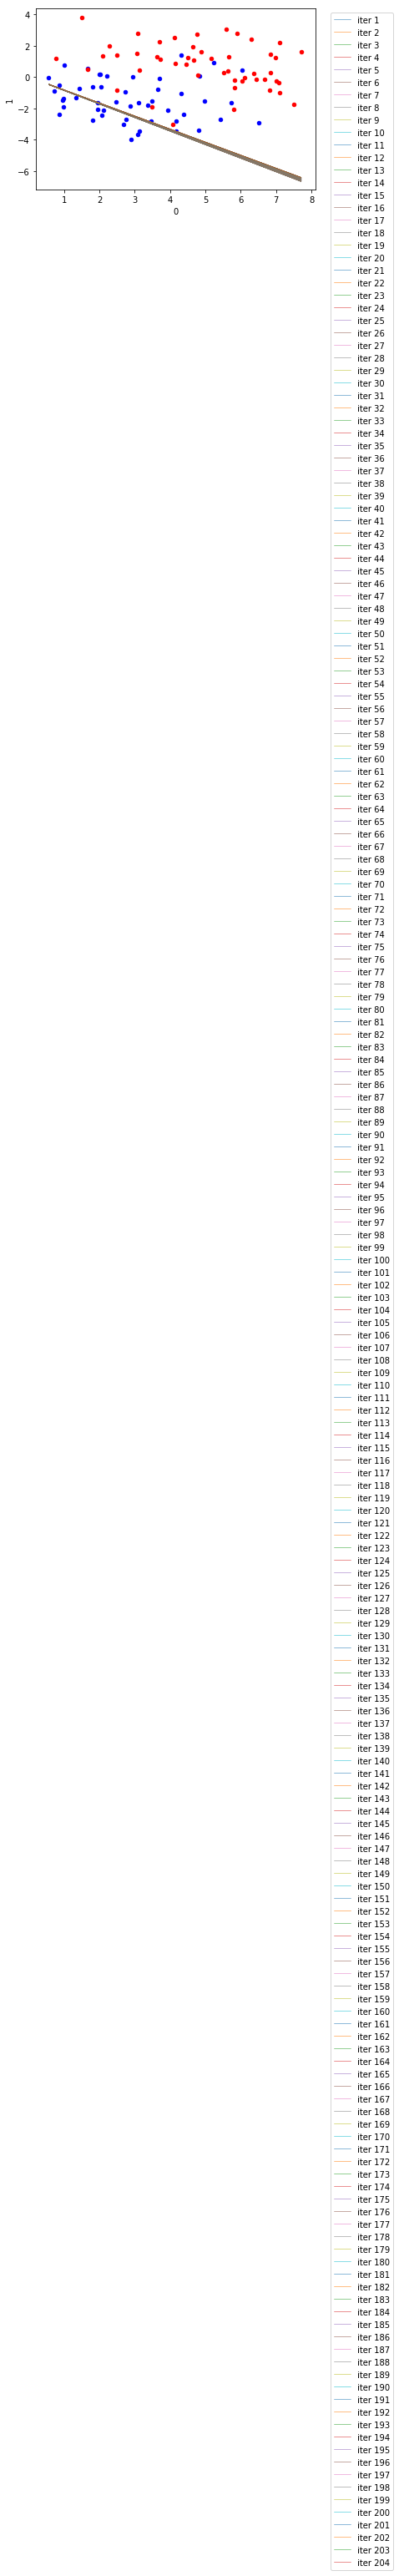

In [5]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
for k, theta in enumerate(all_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")